In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import dynamics.motor_analysis as analysis
import layout.motor_tools as tools
import gdspy
import numpy as np
import generator as generator

In [3]:
from IPython.display import SVG ##to display layout directly

In [4]:
lib = gdspy.GdsLibrary()

In [5]:
shuttle = tools.RotShuttle(None, lib, (0,0), 0, 200, etch_size=8, etch_hole_params={'num_of_points': 12})
shuttle.draw_shuttle()
shuttle.draw_teeth(tooth_extension=0.5)
# shuttle.spiralspring(100, 2, 100)
# shuttle.spiral.opposite_spring()
# shuttle.spiral.opposite_spring(np.pi/2)
# shuttle.spiral.opposite_spring(-np.pi/2)

In [6]:
length = 80
rotor = tools.GCA(None, lib, 50, anchor_width=100)
rotor.draw()
# metal = gdspy.offset(rotor.flexure_ref, -10, layer = tools.METAL, datatype= 0, join_first= True)
# metal2 = gdspy.offset(rotor.stator, -10, layer = tools.METAL, datatype= 0, join_first= True)
# rotor.add((metal, metal2))
# interconnect = gdspy.FlexPath([(60+length,150), (400,150), (400, -125), (-(180+length),-125), (-(180+length), 100), (-(60+length), 100)], width = 70, layer = tools.SOI, datatype= 0 ).to_polygonset()
# metal3 = gdspy.offset(interconnect, -10, layer= tools.METAL, datatype=0)
# rotor.add((interconnect, metal3))
topanchor_bb = rotor.flexure_ref[1].get_bounding_box()



full_motor = tools.SealedMotor(None, lib, rotor, shuttle, 4)
full_motor.draw_gcas()


202.75
pawl pos [ 1.24148569e-14 -2.02750000e+02]
pawl pos [202.75   0.  ]
pawl pos [1.24148569e-14 2.02750000e+02]
pawl pos [-2.02750000e+02  2.48297139e-14]


In [7]:
full_motor.connect_gca_sides(width = 150)


In [8]:
full_motor.connect_opposite_pairs(width = 300, extra_space=100)

In [9]:
full_motor.add_dummy_silicon(10)
full_motor.flagellar_seal(hydrophobic_fingers = True, metal_gap =5)

In [10]:
[ref.origin for ref in full_motor.gca_refs]

[(49.00926398365924, -1052.6816464877836),
 (1052.6816464877836, 49.009263983659174),
 (-49.0092639836591, 1052.6816464877836),
 (-1052.6816464877836, -49.00926398365905)]

In [11]:
metal = full_motor.metalize_GCAs()

In [12]:
result = full_motor.connect_grounds(width =3 )

In [13]:
full_motor.traces_to_pads()

809.8092639836592


In [14]:
path = gdspy.FlexPath([[0,0],[100,0], [200,0]], 20)

In [15]:
path.widths[0,0]

20

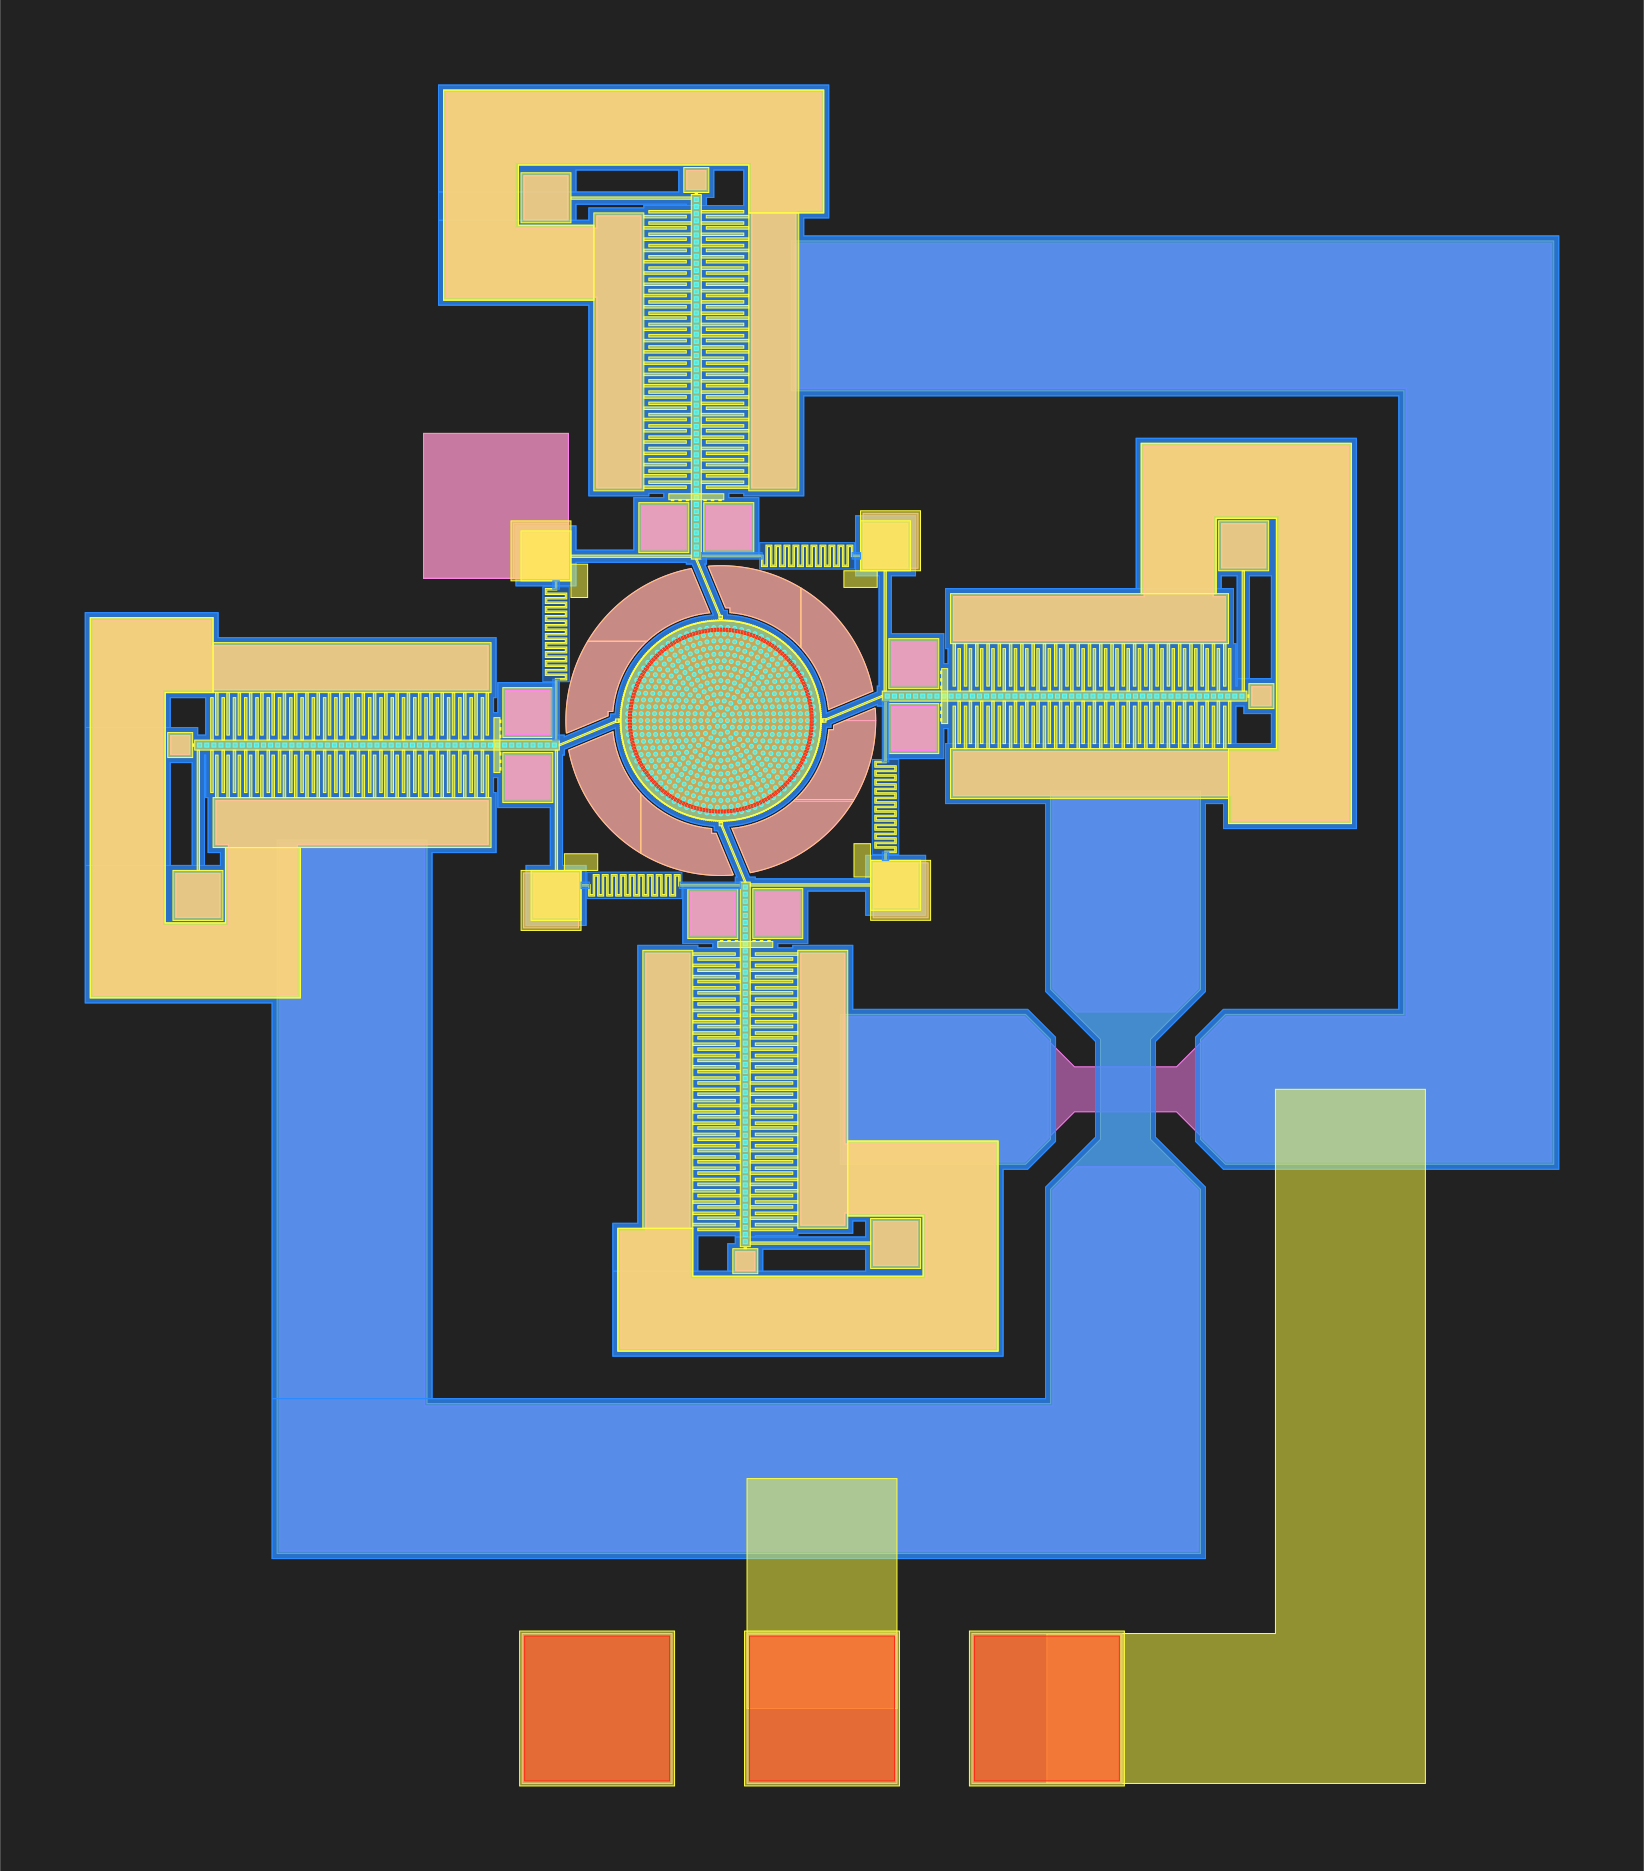

In [16]:
full_motor.write_svg('temp.svg', scaling = 0.5)
SVG('temp.svg')

In [17]:
spring_gauge = tools.SpringGauge(None, lib, shuttle_length =350)
spring_gauge.draw_shuttle()
spring_gauge.draw_parallel_springs()
spring_gauge.draw_bottom_shuttle()

[-90. -74. -58. -42. -26. -10.   6.  22.  38.  54.  70.] [-220. -204. -188. -172. -156. -140. -124. -108.  -92.  -76.  -60.]
[-20.  -4.] [-40. -24.]


In [18]:
spring_gauge.bottom_right_spring.points

array([[  20., -420.],
       [ 170., -420.]])

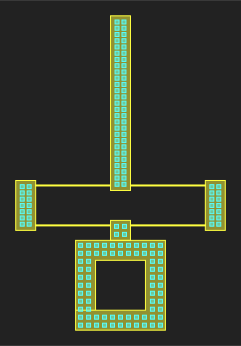

In [19]:
spring_gauge.write_svg('1temp.svg', scaling = 0.5)
SVG('1temp.svg')

In [20]:
lib.write_gds('layout.gds')